# Обучение с учителем: качество модели <br> Предсказание покупательской активности

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
Необходимо разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

В распоряжении имеются следующие данные:
- `...`
    Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
    - `id` — номер покупателя в корпоративной базе данных.
    - `Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
    - `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».
    - `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
    - `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
    - `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.
    - `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
    - `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
    - `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.
    - `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
    - `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.
    - `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.
    - `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

- `...`
    Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

    - `id` — номер покупателя в корпоративной базе данных.
    - `Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
    - `Выручка` — сумма выручки за период.

- `...`
    Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

    - `id` — номер покупателя в корпоративной базе данных.
    - `Период` — название периода, во время которого зафиксировано общее время.
    - `минут` — значение времени, проведённого на сайте, в минутах.

- `...`
    Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

    - `id` — номер покупателя в корпоративной базе данных.
    - `Прибыль` — значение прибыли.


## Цели исследования
- Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».
- Нужно собрать данные по клиентам по следующим группам:
    - Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
    - Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
    - Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
    - Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.

## Ход работы

**Общий план исследования:**
- Загрузка данных
- Предобработка данных (оценка их качестваи при необходимости исправление)
- Исследовательский анализ данных
- Разбивка и подготовка данных к обучению
- Обучение моделей
- Тестирование и верификации
- Выводы

### Подготовка к работе

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler

from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import roc_auc_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import confusion_matrix

from scipy import stats as st

!pip install phik -q
#!pip install numpy==1.23.1
#!pip install numba -U -q
!pip install scikit-learn -U -q 
#!pip install scipy -U -q 
!pip install shap -U -q

import shap

from phik.report import plot_correlation_matrix
from phik import report

### Загрузка и обзор данных

#### Загрузка данных

In [2]:
market_file_df = ... # по просьбе Яндекс Практикума датасет открыто не распространяется
market_money_df = ...
time_df = ...
money_df = ...

#### Обзор данных

In [3]:
display(market_file_df.head())
display(market_money_df.head())
display(time_df.head())
display(money_df.head())

print('id:', len(market_file_df['id'].unique()))

display(market_file_df.info())
display(market_money_df.info())
display(time_df.info())
display(money_df.info())

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


id: 1300
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса       

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

Как видно данные совпадают с предоставленным описанием структуры данных.
Всего доступны данные о 1300 клиентах
Также в некоторых столбцах присутствуют опечатки и несколько странные категории данных

### Предобработка данных

В этом разделе рассмотрим пропуски в данных и проведем необходимые преобразования типов и добавим необходимые столбцы.

#### Рассмотрение пропусков в данных

Рассмотрим в каких каких столбцах сколько пропусков находится

In [4]:
print('Число пропусков в market_file')
print(market_file_df.isna().sum())

print('Число пропусков в market_money')
print(market_money_df.isna().sum())

print('Число пропусков в time')
print(time_df.isna().sum())

print('Число пропусков в money')
print(money_df.isna().sum())

Число пропусков в market_file
id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64
Число пропусков в market_money
id         0
Период     0
Выручка    0
dtype: int64
Число пропусков в time
id        0
Период    0
минут     0
dtype: int64
Число пропусков в money
id         0
Прибыль    0
dtype: int64


Пропуски в данных отсутствуют

#### Исправление опечаток в категориальных переменных
Рассмотрим какие значения принимают категориальные переменные

In [5]:
print('market_file')
for c in market_file_df.select_dtypes(include='object'):
    print('    ', c, ': ', market_file_df[c].unique())

print('market_money')
for c in market_money_df.select_dtypes(include='object'):
    print('    ', c, ': ', market_money_df[c].unique())
    
print('time')
for c in time_df.select_dtypes(include='object'):
    print('    ', c, ': ', time_df[c].unique())

print('money')
for c in money_df.select_dtypes(include='object'):
    print('    ', c, ': ', money_df[c].unique())

market_file
     Покупательская активность :  ['Снизилась' 'Прежний уровень']
     Тип сервиса :  ['премиум' 'стандартт' 'стандарт']
     Разрешить сообщать :  ['да' 'нет']
     Популярная_категория :  ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']
market_money
     Период :  ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']
time
     Период :  ['текущий_месяц' 'предыдцщий_месяц']
money


Как видно обнаружилось некоторое количество опечаток и неявных дубликатов. Отдельного внимания требует значение `препредыдущий_месяц`, непонятно стоит его трактовать как предыдущий или позапрошлый месяц. Если при замене `препредыдущий_месяц` на `предыдущий_месяц` в таблице добавятся дубликаты, значит `препредыдущий_месяц` корректное значение означающее позапрошлый месяц

In [6]:
print(market_money_df.replace('препредыдущий_месяц','предыдущий_месяц')[['id', 'Период']].duplicated().sum())
print(market_money_df[['id', 'Период']].duplicated().sum())
print('Значение препредыдущий_месяц корректно')

1300
0
Значение препредыдущий_месяц корректно


Устраним опечатки в данных

In [7]:
market_money_df = market_money_df.replace('предыдцщий_месяц','предыдущий_месяц')
time_df = time_df.replace('предыдцщий_месяц','предыдущий_месяц')
market_file_df = market_file_df.replace('стандартт','стандарт')

print('market_file')
for c in market_file_df.select_dtypes(include='object'):
    print('    ', c, ': ', market_file_df[c].unique())

print('market_money')
for c in market_money_df.select_dtypes(include='object'):
    print('    ', c, ': ', market_money_df[c].unique())
    
print('time')
for c in time_df.select_dtypes(include='object'):
    print('    ', c, ': ', time_df[c].unique())

print('money')
for c in money_df.select_dtypes(include='object'):
    print('    ', c, ': ', money_df[c].unique())

market_file
     Покупательская активность :  ['Снизилась' 'Прежний уровень']
     Тип сервиса :  ['премиум' 'стандарт']
     Разрешить сообщать :  ['да' 'нет']
     Популярная_категория :  ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']
market_money
     Период :  ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']
time
     Период :  ['текущий_месяц' 'предыдущий_месяц']
money


#### Явные дубликаты

Рассмотрим наличие явных дубликатов в данных.

In [8]:
print('Число явных дубликатов в market_file:', market_file_df.duplicated().sum())
print('Число явных дубликатов в market_money:', market_money_df.duplicated().sum())
print('Число явных дубликатов в time:', time_df.duplicated().sum())
print('Число явных дубликатов в money:', money_df.duplicated().sum())

Число явных дубликатов в market_file: 0
Число явных дубликатов в market_money: 0
Число явных дубликатов в time: 0
Число явных дубликатов в money: 0


Явных дубликатов нет, неявные дубликаты были устранены в предыдущем пункте

#### Итоги предобработки данных
В ходе предобработки были удалены все дубликаты и устранены опечатки и неявные опечатки, пропуски в данных не обнаружены.

### Исследовательский анализ данных

Опишем общую информацию о распределениях данных в таблицах

#### Категориальные переменные в `market_file`

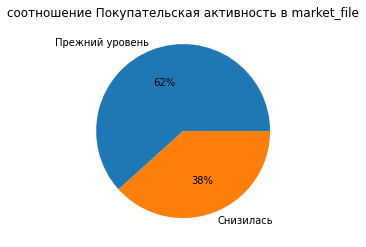

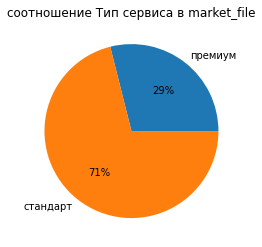

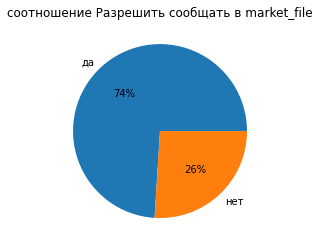

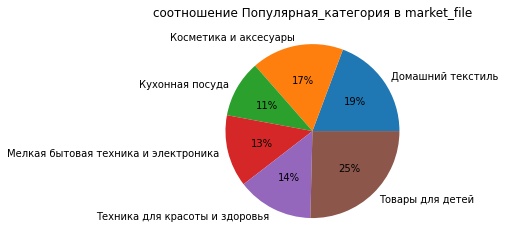

In [9]:
df = market_file_df

for c in df.select_dtypes(include='object'):
    df.pivot_table(index=c, aggfunc='count').plot(y='id', kind='pie', autopct='%1.0f%%', legend=False, ylabel='', title='соотношение '+c+' в market_file')
    plt.show()

Для целевого параметра `Покупательская активность` наблюдается явный дисбаланс классов

#### Количественные переменные в `market_file`

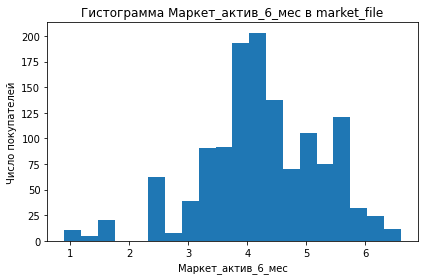

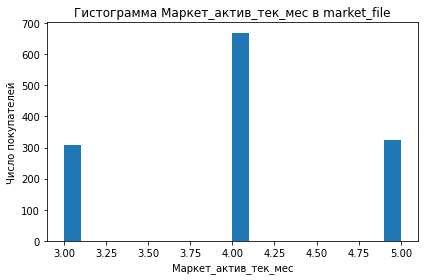

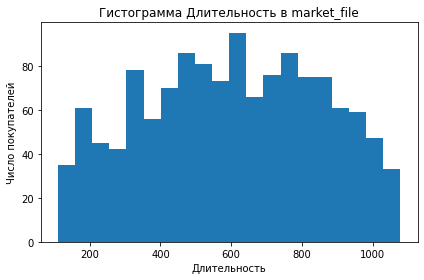

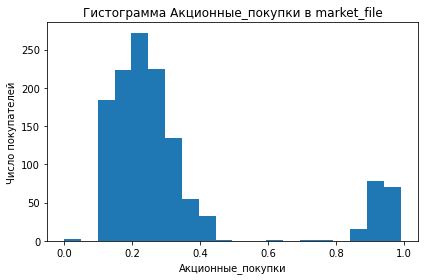

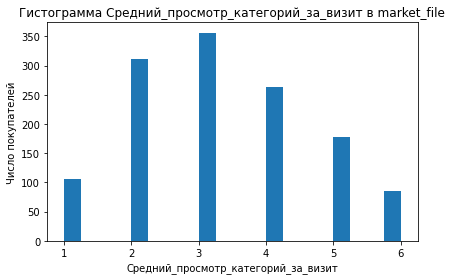

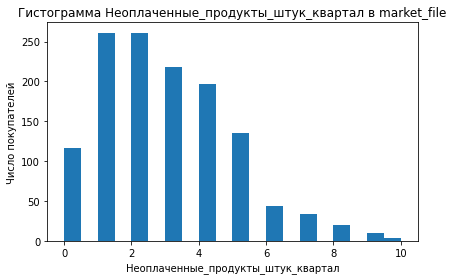

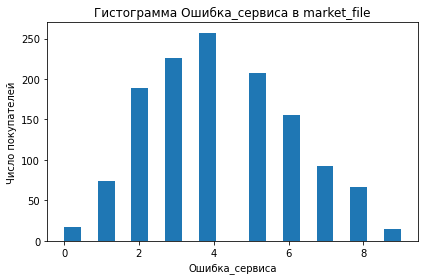

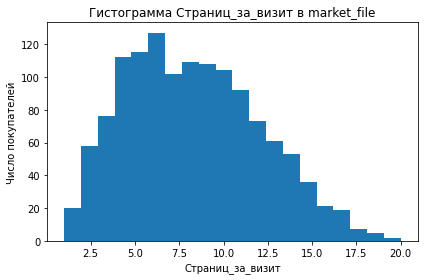

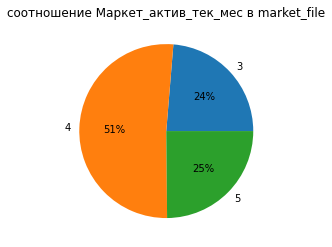

In [10]:
df = market_file_df

for c in df.select_dtypes(include='number'):
    if c=='id': continue
    fig, ax = plt.subplots()
    ax.hist(df[c], bins=20)
    
    ax.set_xlabel(c)
    ax.set_ylabel('Число покупателей')
    ax.set_title('Гистограмма '+c+' в market_file')
    fig.tight_layout()
    plt.show()
    
df.pivot_table(index='Маркет_актив_тек_мес', aggfunc='count').plot(y='id', kind='pie', autopct='%1.0f%%', legend=False, ylabel='', title='соотношение '+'Маркет_актив_тек_мес'+' в market_file')
plt.show()

Покупатели разделились на 2 явных кластера по параметру `Акционные покупки`

Параметр `Маркет_актив_тек_мес` принимает лишь 3 различных значения

Распределение остальных параметров близки к нормальным

#### Категориальные переменные в `market_money`

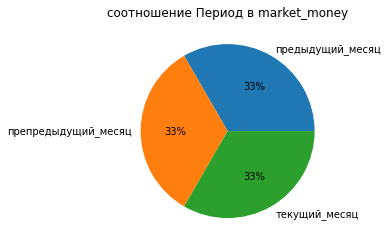

In [11]:
df = market_money_df

for c in df.select_dtypes(include='object'):
    df.pivot_table(index=c, aggfunc='count').plot(y='id', kind='pie', autopct='%1.0f%%', legend=False, ylabel='', title='соотношение '+c+' в market_money')
    plt.show()

#### Количественные переменные в `market_money`

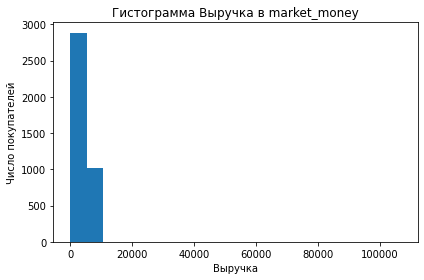

In [12]:
df = market_money_df

for c in df.select_dtypes(include='number'):
    if c=='id': continue
    fig, ax = plt.subplots()
    ax.hist(df[c], bins=20)
    
    ax.set_xlabel(c)
    ax.set_ylabel('Число покупателей')
    ax.set_title('Гистограмма '+c+' в market_money')
    fig.tight_layout()
    plt.show()

Параметр `Выручка` имеет аномальные значения, рассмотрим их

In [13]:
display(market_money_df[market_money_df['Выручка']>20000])

ids = market_money_df.loc[market_money_df['Выручка']>20000, 'id']

display(market_file_df[market_file_df['id'].isin(ids)])

display(time_df[time_df['id'].isin(ids)])

display(money_df[money_df['id'].isin(ids)])

,id,Период,Выручка
98,215380,текущий_месяц,106862.2


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
32,215380,Снизилась,премиум,нет,1.7,4,637,0.94,Техника для красоты и здоровья,3,2,4,7


,id,Период,минут
64,215380,предыдущий_месяц,12
65,215380,текущий_месяц,14


,id,Прибыль
32,215380,3.88


Как видно пользователь с аномальной выручкой всего один. Всего параметры для него кроме выручки на уровне средних значений.

Однако заметим, что для него высокая выручка, но прибыль остается на уровне средней, что не совсем естественно.

Таким образом можно предположить, что в столбце `Выручка` для данного пользователся ошибка, исправить которую не представляется возможным

Удалим данные об этом пользователе из всех таблиц

In [14]:
market_file_df = market_file_df[~market_file_df['id'].isin(ids)]
market_money_df = market_money_df[~market_money_df['id'].isin(ids)]
time_df = time_df[~time_df['id'].isin(ids)]
money_df = money_df[~money_df['id'].isin(ids)]

#### Категориальные переменные в `time`

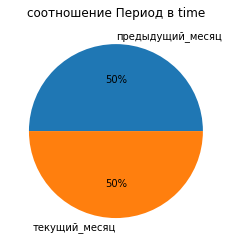

In [15]:
df = time_df

for c in df.select_dtypes(include='object'):
    df.pivot_table(index=c, aggfunc='count').plot(y='id', kind='pie', autopct='%1.0f%%', legend=False, ylabel='', title='соотношение '+c+' в time')
    plt.show()

#### Количественные переменные в `time`

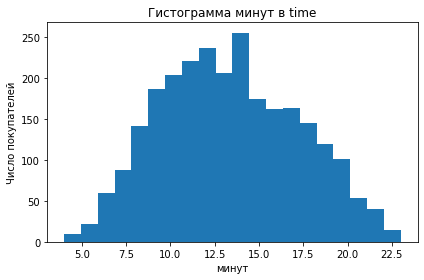

In [16]:
df = time_df

for c in df.select_dtypes(include='number'):
    if c=='id': continue
    fig, ax = plt.subplots()
    ax.hist(df[c], bins=20)
    
    ax.set_xlabel(c)
    ax.set_ylabel('Число покупателей')
    ax.set_title('Гистограмма '+c+' в time')
    fig.tight_layout()
    plt.show()

Все распределения близки к нормальным

#### Количественные переменные в `money`

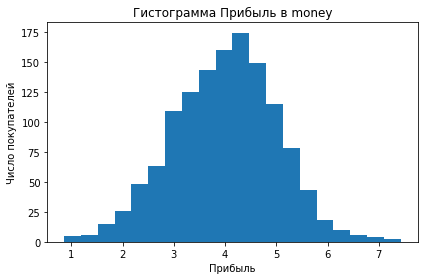

In [17]:
df = money_df

for c in df.select_dtypes(include='number'):
    if c=='id': continue
    fig, ax = plt.subplots()
    ax.hist(df[c], bins=20)
    
    ax.set_xlabel(c)
    ax.set_ylabel('Число покупателей')
    ax.set_title('Гистограмма '+c+' в money')
    fig.tight_layout()
    plt.show()

Распределение прибыли близко к нормальному

### Выборка клиентов

Нас интересуют клиенты с ненулевой покупательской активностью за последние 3 месяца (т.е. сделавшие хоть одну покупку за этот период). Отберем таких клиентов

In [18]:
# выбраем все записи в которых были ненулевые покупки и выцепляем из них все уникальные id
active_ids = set(market_money_df.loc[market_money_df['Выручка']>0, 'id']) 
#print(len(active_ids))

market_file_df = market_file_df[market_file_df['id'].isin(active_ids)]
market_money_df = market_money_df[market_money_df['id'].isin(active_ids)]
time_df = time_df[time_df['id'].isin(active_ids)]
money_df = money_df[money_df['id'].isin(active_ids)]

### Объединение таблиц

Объединим таблицы `market_file`, `market_money`, `time` в одну, выделив для выручки в каждый месяц отдельный столбец

In [19]:
time_cur = time_df[time_df['Период']=='текущий_месяц'].rename(columns={'минут':'минут_текущий_месяц'}).drop('Период', axis=1)
time_prev = time_df[time_df['Период']=='предыдущий_месяц'].rename(columns={'минут':'минут_предыдущий_месяц'}).drop('Период', axis=1)

market_money_cur = market_money_df[market_money_df['Период']=='текущий_месяц'].rename(columns={'Выручка':'Выручка_текущий_месяц'}).drop('Период', axis=1)
market_money_prev = market_money_df[market_money_df['Период']=='предыдущий_месяц'].rename(columns={'Выручка':'Выручка_предыдущий_месяц'}).drop('Период', axis=1)
market_money_preprev = market_money_df[market_money_df['Период']=='препредыдущий_месяц'].rename(columns={'Выручка':'Выручка_препредыдущий_месяц'}).drop('Период', axis=1)

#display(market_money_preprev)

full = market_file_df.merge(market_money_cur, on='id', how='outer')\
.merge(market_money_prev, on='id', how='outer')\
.merge(market_money_preprev, on='id', how='outer')\
.merge(time_cur, on='id', how='outer')\
.merge(time_prev, on='id', how='outer')

display(full.head())

print('Число пропусков в full')
print(full.isna().sum())

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_текущий_месяц,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,минут_текущий_месяц,минут_предыдущий_месяц
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,3293.1,0.0,0.0,14,13
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4971.6,5216.0,4472.0,10,12
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5058.4,5457.5,4826.0,13,8
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6610.4,6158.0,4793.0,13,11
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5872.5,5807.5,4594.0,11,8


Число пропусков в full
id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
Выручка_текущий_месяц                  0
Выручка_предыдущий_месяц               0
Выручка_препредыдущий_месяц            0
минут_текущий_месяц                    0
минут_предыдущий_месяц                 0
dtype: int64


### Корреляционный анализ

Рассмотрим матрицу корреляции между признаками в таблице full

Т.к. не все параметры распределены нормально, использование коэфициента корреляции Пирсона может быть некорректным.

Рассмотрим коэфициент корреляции $\varphi_k$

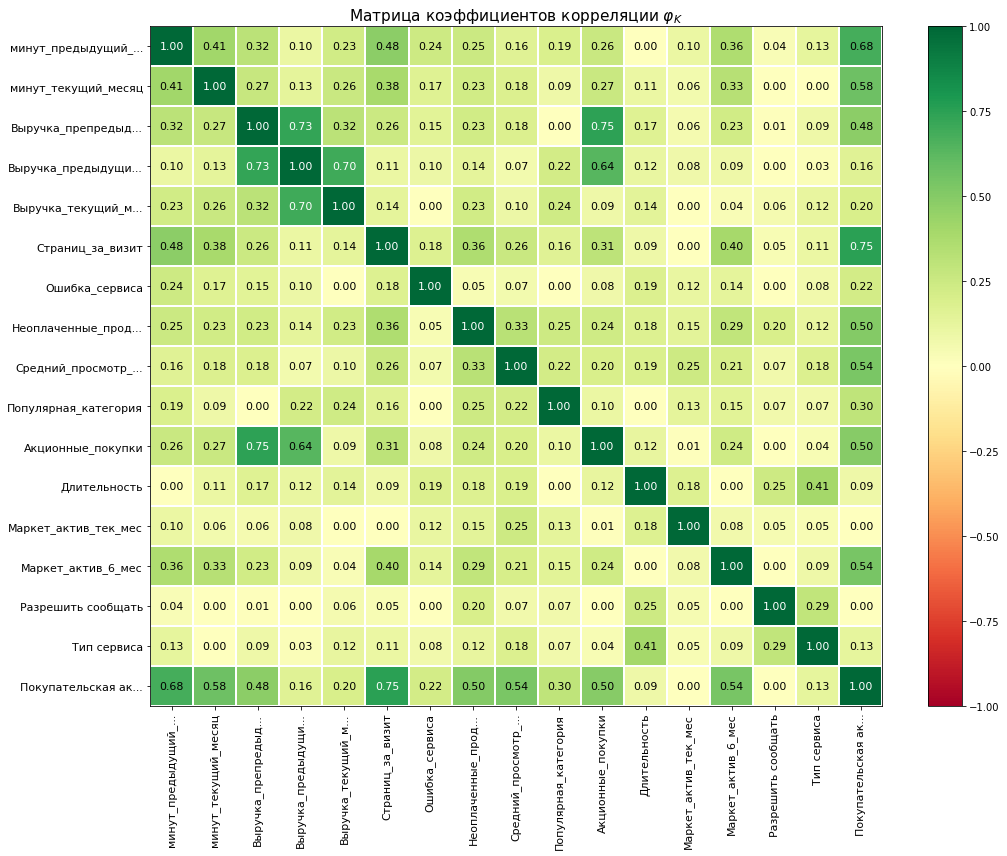

In [20]:
df = full.drop('id', axis=1)

interval_cols = df.select_dtypes(include='number')

# вычисление коэффициентов корреляции phi для датафрейма df
phik_overview = df.phik_matrix(interval_cols=interval_cols)

# визуализация тепловой карты коэффициентов корреляции
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    title=r"Матрица коэффициентов корреляции $\varphi_K$",
    fontsize_factor=1.1,
    figsize=(15, 12)
)

Рассмотрев матрицу корреляции можно сделать вывод что в таблице отсутствуют мультиколлинеарные признаки и утечка целевого параметра

### Подготовка данных и обучение модели

В данном разделе подготовим данные для обучения и обучим 4 различных модели (`KNeighborsClassifier`, `DecisionTreeClassifier`, `LogisticRegression` и  `SVC` с автоматическим учетом дисбаланса классов).

При подготовке данных будем использовать скейлеры `MinMaxScaler` и `StandardScaler` и кодировщики `OHE` и `OrdinalEncoder`.

Среди всех обученных моделей будет выбрана одна с лучшими результатами.

#### Создание пайплайна предобработки данных

In [21]:
RANDOM_STATE = 2024

cat_columns = full.drop(['id', 'Покупательская активность'], axis=1).select_dtypes(include='object').columns
print(cat_columns)
num_columns = full.drop(['id', 'Покупательская активность'], axis=1).select_dtypes(include='number').columns
print(num_columns)
################################################
parameters = [
    #KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1, 20),
        'preprocessor__scaler__scale': [StandardScaler(), MinMaxScaler()],
        'preprocessor__encoder__encode':[OneHotEncoder(handle_unknown='ignore'),OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)]
    },
    #DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE,class_weight='balanced')],
        'models__max_depth': range(2, 11),
        'preprocessor__scaler__scale': [StandardScaler(), MinMaxScaler()],
        'preprocessor__encoder__encode':[OneHotEncoder(handle_unknown='ignore'),OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)]
    },
    #SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE,class_weight='balanced')],
        'models__C': [0.1, 0.3, 0.7, 1, 1,5, 2, 3],
        'preprocessor__scaler__scale': [StandardScaler(), MinMaxScaler()],
        'preprocessor__encoder__encode':[OneHotEncoder(handle_unknown='ignore'), 
            OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)]
    },
    #LogisticRegression()
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, penalty='l1', solver='saga',class_weight='balanced')],
        'models__C': [0.1, 0.3, 0.7, 1, 1.5, 2, 3, 5],
        'preprocessor__scaler__scale': [StandardScaler(), MinMaxScaler()],
        'preprocessor__encoder__encode':[OneHotEncoder(handle_unknown='ignore'), 
            OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)]
    }
] 
################################################
encoder_pipe = Pipeline(
    [
        ('fillna1', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('encode', OneHotEncoder(drop='first', handle_unknown='ignore')),
        ('fillna2', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
    )
################################################
scaler_pipe = Pipeline(
    [
        ('scale', MinMaxScaler())
    ]
    )
################################################
data_preprocessor = ColumnTransformer(
    [('encoder', encoder_pipe, cat_columns),
     ('scaler', scaler_pipe, num_columns)
    ], 
    remainder='passthrough'
)
################################################
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

Index(['Тип сервиса', 'Разрешить сообщать', 'Популярная_категория'], dtype='object')
Index(['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит', 'Выручка_текущий_месяц', 'Выручка_предыдущий_месяц',
       'Выручка_препредыдущий_месяц', 'минут_текущий_месяц',
       'минут_предыдущий_месяц'],
      dtype='object')


#### Разбивка данных для обучения

Разделим данные на обучающую и тестовую выборки (тестовая выборка 25%).

Целевой параметр: `Покупательская активность`, входными параметрами будет  все кроме `id`

Т.к. наблюдается явный дисбаланс классов в целевом параметре, то разбивка будет проводиться со стратификацией

Целевой параметр `Покупательская активность` принимает значения:
- `Снизилась`
- `Прежний уровень`

Для корректной работы моделей закодируем их следующим образом:
- `Снизилась`: `0`
- `Прежний уровень` : `1`


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    full.drop(['Покупательская активность','id'], axis=1),
    full['Покупательская активность'].replace({'Снизилась':0,'Прежний уровень':1}),
    test_size = 0.25, 
    random_state = RANDOM_STATE,
    stratify = full['Покупательская активность'].replace({'Снизилась':0,'Прежний уровень':1}))

display(X_train.head())

display(y_train.head())

,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_текущий_месяц,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,минут_текущий_месяц,минут_предыдущий_месяц
404,премиум,да,5.5,5,191,0.17,Косметика и аксесуары,6,0,4,8,4168.0,4395.5,4808.0,15,15
263,премиум,нет,4.4,3,255,0.94,Домашний текстиль,3,5,7,7,6687.0,5848.5,4410.0,12,8
25,премиум,нет,3.8,3,811,0.90,Товары для детей,2,5,5,3,5161.1,4632.0,4293.0,8,10
830,стандарт,да,3.6,4,677,0.18,Домашний текстиль,6,1,6,9,4999.0,5109.5,5387.0,18,18
275,премиум,нет,2.4,4,399,0.35,Косметика и аксесуары,2,4,3,3,4439.6,5009.0,4646.0,15,7


404    1
263    0
25     0
830    1
275    0
Name: Покупательская активность, dtype: int64

#### Обучение и тестирование моделей

Исходя из бизнес-задачи будем считать что неверное предсказание того, что покупательская способность осталась на преженем уровне при ее фактическом спаде является более критичной (ошибка FP), т.к. в таком случае выше риск потерять клиентов.

Для оценки качества моделей будем использовать метрику $f_\beta$ чтобы учитывать ошибки обоих родов.

Выберем значение $\beta=\frac{1}{2}$ (перевес в сторону precision)

In [23]:
import warnings
warnings.filterwarnings('ignore') # чтобы не лезли предупреждения о превышении числа итераций

f05 = make_scorer(lambda x,y: fbeta_score(x,y,beta=0.5))

grid_search = GridSearchCV(
    pipe_final, 
    parameters, 
    cv=5,
    scoring=f05,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', grid_search.best_estimator_)
print('Лучшая модель и её параметры:\n\n', grid_search.best_params_)

print ('Метрика лучшей модели на тренировочной выборке:', grid_search.best_score_)

# прогноз на тестовых данных
y_test_pred = grid_search.predict(X_test)
print(f'Метрика f0.5 на тестовой выборке: {fbeta_score(y_test, y_test_pred, beta=0.5)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  Pipeline(steps=[('fillna1',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('fillna2',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  Index(['Тип сервиса', 'Разрешить сообщать', 'Популярн...
       'Акционные_покупки', 'Сред

Среди всех моделей лучше всего себя показала модель логистической регрессии с параметром регуляризации l1 C=0.1, солвером saga, кодировщиком OrdinalEncoder и скейлером StandardScaler.

Значения метрики на тренировочной и тестовой выборках близки, что говорит об отсутствии переобучения или недообучения.

Немного смущает что результат на тестовой выборке чуть-чуть выше чем на тренировочной, но для других значений random_state такого нет и, исходя из логики входных параметров, утечки целевого признака быть не должно.

### Анализ важности признаков

Лучшее качество показала модель SVC, однако для нее нет встроенных методов оценки важности признаков.

В данном разделе проведем анализ важности признаков для лучшей модели методом SHAP.

In [24]:
tr = grid_search.best_estimator_[0]
model = grid_search.best_estimator_[1]

#X_test_tr = pd.DataFrame(tr.transform(X_test), columns=tr.get_feature_names_out())
X_test_tr = tr.transform(X_test)

# это будет долго
explainer = shap.Explainer(model.predict, X_test_tr, feature_names=tr.get_feature_names_out())
shap_values = explainer(X_test_tr)

PermutationExplainer explainer: 326it [01:26,  3.48it/s]                         


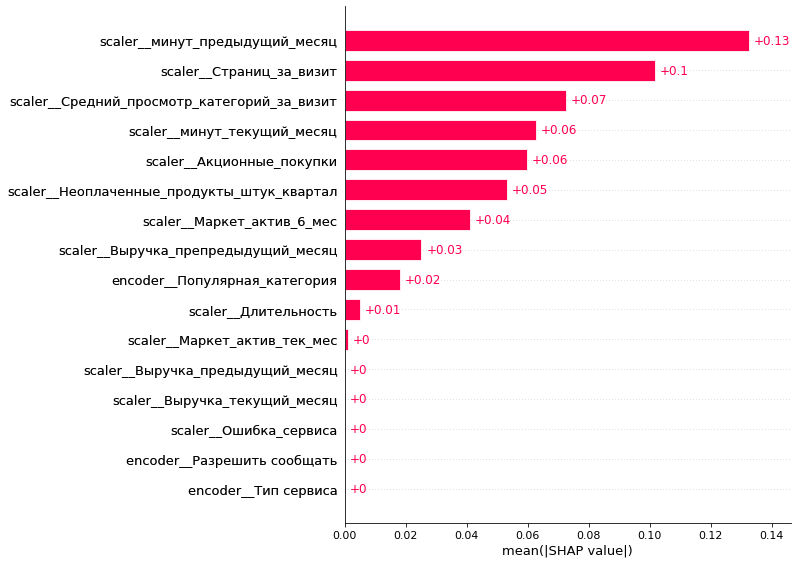

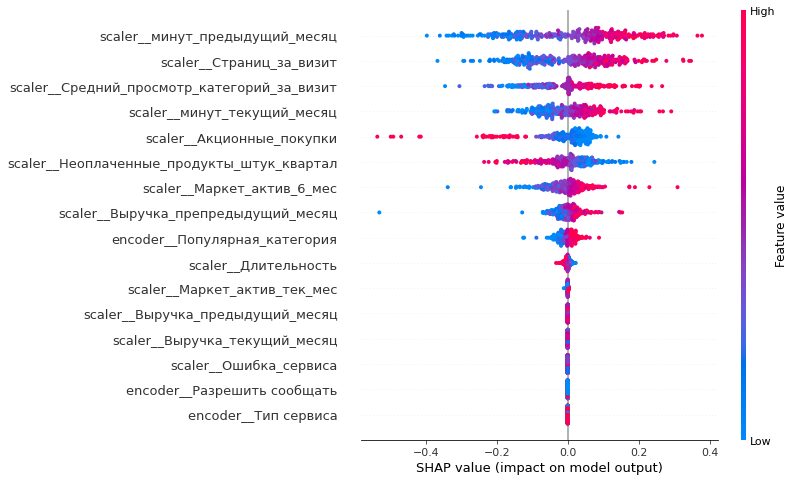

In [25]:
shap.plots.bar(shap_values, max_display=30) 
shap.plots.beeswarm(shap_values, max_display=30) 

Получили, что наиболее значимыми являются признаки:
- `минут_предыдущий_месяц` (чем больше, тем выше шанс сохранения покупательской активности)
- `Страниц_за_визит` (чем больше, тем выше шанс сохранения покупательской активности)
- `Средний_просмотр_категорий_за_визит` (чем больше, тем выше шанс сохранения покупательской активности)
- `минут_текущий_месяц` (чем больше, тем выше шанс сохранения покупательской активности)
- `Акционные_покупки` (чем больше, тем выше вероятность снижения покупательской активности)
- `Неоплаченные_продукты_штук_квартал` (чем больше, тем выше вероятность снижения покупательской активности)
- `Маркет_актив_6_мес`  (чем больше, тем выше шанс сохранения покупательской активности)

Наименее значимые категории:
- `Тип сервиса`
- `Разрешить сообщать`
- `Ошибка_сервиса`
- `Выручка_текущий_месяц`
- `Выручка_предыдущий_месяц`
- `Маркет_актив_тек_мес`

Из анализа значимости признаков можно сделать вывод, что заинтересованность пользователя в сайте и его активность на нем (не только покупки, но и просто просмотр сайта) положительно влияют на сохранение покупательской активности.

В то же время высокая доля покупок по акции и высокое число неоплаченных продуктов свидетельствуют о снижении покупательской активности пользователей

### Сегментация пользователей

Как уже отмечалось ранее, пользователи разделись на 2 четко разделимых группы с высокой и низкой долей акционных покупок

В качестве границы этих групп выберем величину 60%

В данном разделе рассмотрим сегмент пользователей с высокой долей покупок по акции

Т.к. в этом разделе будем также рассматривать прибыль от пользователей, добавим соответствующий столбец в общую таблицу

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_текущий_месяц,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,минут_текущий_месяц,минут_предыдущий_месяц,Прибыль
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4971.6,5216.0,4472.0,10,12,4.16
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6610.4,6158.0,4793.0,13,11,4.87
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5872.5,5807.5,4594.0,11,8,4.21
14,215362,Снизилась,премиум,да,4.2,4,438,0.74,Домашний текстиль,3,4,6,4,4447.9,4314.0,4765.0,13,13,3.49
16,215364,Снизилась,премиум,да,4.3,4,708,0.98,Домашний текстиль,3,3,3,3,5484.8,5795.5,4942.0,9,11,2.67


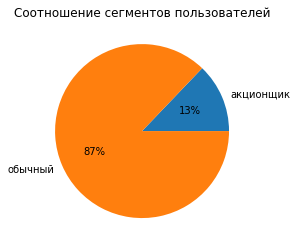

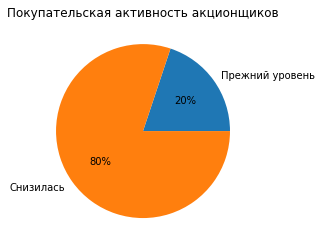

In [26]:
full = full.merge(money_df, on='id')

sales = full[full['Акционные_покупки']>0.6]

full['Сегмент пользователя'] = full['Акционные_покупки'].apply(lambda x: 'обычный' if x<0.6 else 'акционщик')

display(sales.head())

full.pivot_table(index='Сегмент пользователя', aggfunc='count').plot(y='id', kind='pie', autopct='%1.0f%%', legend=False, ylabel='', title='Соотношение сегментов пользователей')
plt.show()

sales.pivot_table(index='Покупательская активность', aggfunc='count').plot(y='id', kind='pie', autopct='%1.0f%%', legend=False, ylabel='', title='Покупательская активность акционщиков')
plt.show()

Доля рассматриваемого сегмента всего 13% от общего числа пользователей, однако процент пользователей в этом сегменте, покупательская активность которых снизилась, составляет 80%

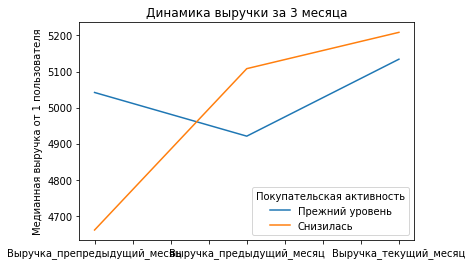

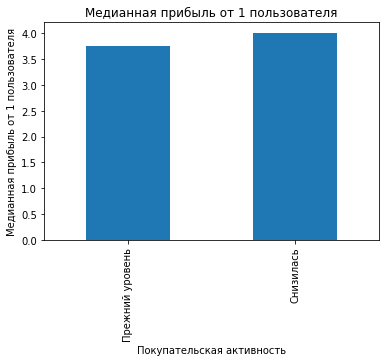

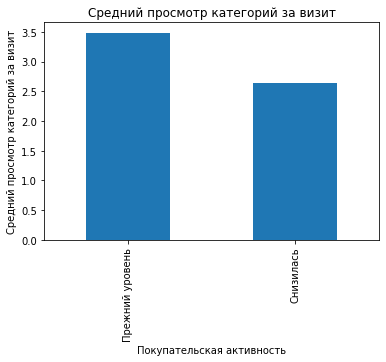

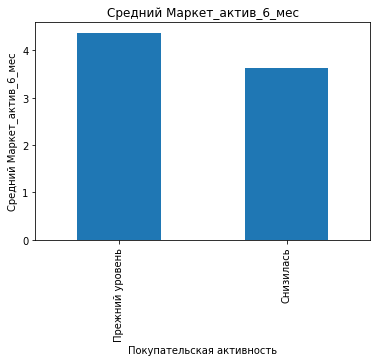

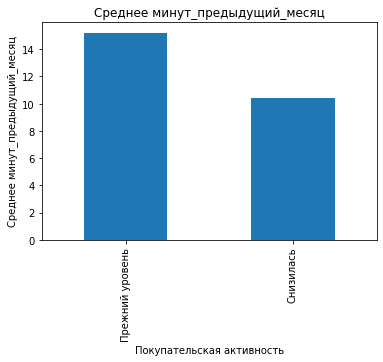

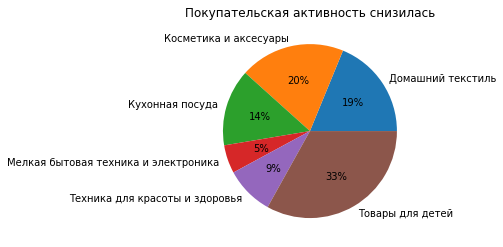

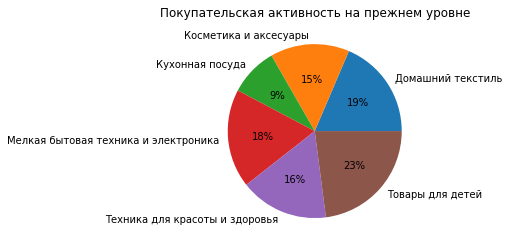

In [27]:
sales.pivot_table(index='Покупательская активность', aggfunc='median')[['Выручка_препредыдущий_месяц','Выручка_предыдущий_месяц','Выручка_текущий_месяц']].T.plot(ylabel='Медианная выручка от 1 пользователя', title='Динамика выручки за 3 месяца')
plt.show()

sales.pivot_table(index='Покупательская активность', aggfunc='median')['Прибыль'].plot(kind='bar', ylabel='Медианная прибыль от 1 пользователя', title='Медианная прибыль от 1 пользователя')
plt.show()

sales.pivot_table(index='Покупательская активность', aggfunc='mean')['Средний_просмотр_категорий_за_визит'].plot(kind='bar', ylabel='Средний просмотр категорий за визит', title='Средний просмотр категорий за визит')
plt.show()

sales.pivot_table(index='Покупательская активность', aggfunc='mean')['Маркет_актив_6_мес'].plot(kind='bar', ylabel='Средний Маркет_актив_6_мес', title='Средний Маркет_актив_6_мес')
plt.show()

sales.pivot_table(index='Покупательская активность', aggfunc='mean')['минут_предыдущий_месяц'].plot(kind='bar', ylabel='Среднее минут_предыдущий_месяц', title='Среднее минут_предыдущий_месяц')
plt.show()

sales[sales['Покупательская активность']=="Снизилась"].pivot_table(index='Популярная_категория', aggfunc='count').plot(y='id', kind='pie', autopct='%1.0f%%', legend=False, ylabel='', title='Покупательская активность снизилась')
plt.show()

full[full['Покупательская активность']=="Прежний уровень"].pivot_table(index='Популярная_категория', aggfunc='count').plot(y='id', kind='pie', autopct='%1.0f%%', legend=False, ylabel='', title='Покупательская активность на прежнем уровне')
plt.show()

Получили, что среди клиентов с высокой долей акционных покупок медианная прибыль от 1 пользователя почти не зависит от покупательской активности.
Динамика прибыли за последние 3 месяца показывает схожий рост для обоих подгрупп по покупательской активности в данном сегменте.

Общая активность пользователей со снизившейся покупательской активностью также снизилась

Заметим, что в рассматриваемом сегменте среди пользователей со снизившейся покупательской активностью популярны категории:
- Товары для детей 
- Домашний текстиль
- Косметика и аксесуары
- Кухонная посуда

Таким образом этих пользователей можно описать как домохозяек.

В итоге можно дать соответствующие рекомендации:
- увеличить рассылку для пользователей промаркированных сниженной активностью в данном сегменте
- увеличить число акций в описанных выше категориях

Получили, что доля пользователей покупающих в основном по акции не велика, всего 13%. Однако у 80% из них в течение 3 месяцев снижалась покупательская актвность, что практически диаметрально противоположно обычным пользователям (у 68% обычных пользователей сохраняется покупательская активность).

Таким образом необходимо предпринимать меры по удержанию клиентов предпочитающих акционные товары. Это возможно сделать путем рассылки персональных акционных приложений, системы баллов и прочего.

Данные меры можно считать допустимыми и рентабильными т.к. по имеющимся данным 1 клиент из каждого сегментов в среднем приносит сопоставимую прибыль (так бывает не всегда).

С другой стороны предложенные меры никак способствуют переходу таких клиентов в сегмент обычных, а наоборот провоцируют увеличение доли "акционщиков"

## Выводы

В данной работе рассматривались данные интернет-магазина «В один клик» о покупательской активности клиентов. Целью работы был выбор и обучение оптимальной модели машинного обучения для предсказания покупательской активности клиентов в следующие 3 месяца а также рассмотрение одного сегмента клиентов

В ходе предобработки данных были выявлены и исправлены опечатки в категориальных типах, в целом качесво данных можно оценить как хорошее.

В ходе работы было обучено несколько различных моделей МО с различными гиперпараметрами, среди которых была выбрана лучшая:
- Логистическая регрессия с параметром регуляризации l1 C=0.1, солвер saga, кодировщик OrdinalEncoder, скейлер StandardScaler

Для оценки моделей была использована метрика $f_{0.5}$, значение которой для лучшей модели на тестовой выборке равняется 0.91.

Такой выбор метрики обусловлен желанием минимизации ошибок первого и второго рода с большим вниманием в сторону неправильного предсказания сохранения покупательской активности.

С использованием метода SHAP было выяснено, что наибольший вклад вносят следующие признаки:
- `минут_предыдущий_месяц` (чем больше, тем выше шанс сохранения покупательской активности)
- `Страниц_за_визит` (чем больше, тем выше шанс сохранения покупательской активности)
- `Средний_просмотр_категорий_за_визит` (чем больше, тем выше шанс сохранения покупательской активности)
- `минут_текущий_месяц` (чем больше, тем выше шанс сохранения покупательской активности)
- `Акционные_покупки` (чем больше, тем выше вероятность снижения покупательской активности)
- `Неоплаченные_продукты_штук_квартал` (чем больше, тем выше вероятность снижения покупательской активности)
- `Маркет_актив_6_мес`  (чем больше, тем выше шанс сохранения покупательской активности)

Из анализа значимости признаков можно сделать вывод, что заинтересованность пользователя в сайте и его активность на нем (не только покупки, но и просто просмотр сайта) положительно влияют на сохранение покупательской активности.

В то же время высокая доля покупок по акции и высокое число неоплаченных продуктов свидетельствуют о снижении покупательской активности пользователей.

Также был рассмотрен сегмент пользователей с высокой долей акционных покупок.
Получено, что среди клиентов с высокой долей акционных покупок медианная прибыль от 1 пользователя почти не зависит от покупательской активности.
Динамика прибыли за последние 3 месяца показывает схожий рост для обоих подгрупп по покупательской активности в данном сегменте.
Общая активность пользователей со снизившейся покупательской активностью также снизилась.
Заметим, что в рассматриваемом сегменте среди пользователей со снизившейся покупательской активностью популярны категории:
- Товары для детей 
- Домашний текстиль
- Косметика и аксесуары
- Кухонная посуда

Таким образом этих пользователей можно описать как домохозяек.

В итоге можно дать соответствующие рекомендации:
- увеличить общую рассылку для пользователей промаркированных сниженной активностью в данном сегменте
- увеличить число акций в описанных выше категориях